$$
\textbf{Sentiment Analysis using NLP}
$$



![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*yni8NcxBgZPbKwQQ.jpg)


### Import and download libraries

In [210]:
pip install emoji


In [211]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [212]:
# Download the WordNet resource
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load Data

In [213]:
# read data
df = pd.read_csv('/content/sample_data/twitter_training.csv')

### Preprocessing

In [214]:
# Assign column names based on their order
df.columns = ['id', 'topic', 'sentiment', 'text']

In [215]:
# drop unnecessary data
df = df.drop('id', axis=1)

In [216]:
df.head()

,topic,sentiment,text
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [217]:
# Check for missing values
df.isnull().sum()

,0
topic,0
sentiment,0
text,686


In [218]:
# remove missing values
df.dropna(inplace=True)
# Verify if any missing values remain
df.isnull().sum()

,0
topic,0
sentiment,0
text,0


In [219]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      73995 non-null  object
 1   sentiment  73995 non-null  object
 2   text       73995 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [220]:
# check for duplicate values
df.duplicated().sum()

3038

In [221]:
# remove duplicate values
df = df.drop_duplicates()
# Verify if any duplicate values remain
df.duplicated().sum()


0

### Visualization

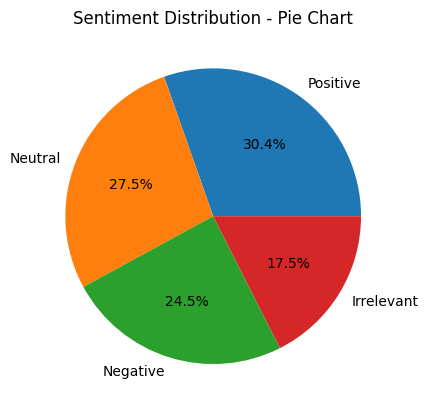

In [222]:
# Plotting a simple pie chart for sentiment distribution
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].unique(), autopct='%1.1f%%')

plt.title('Sentiment Distribution - Pie Chart')

plt.show()

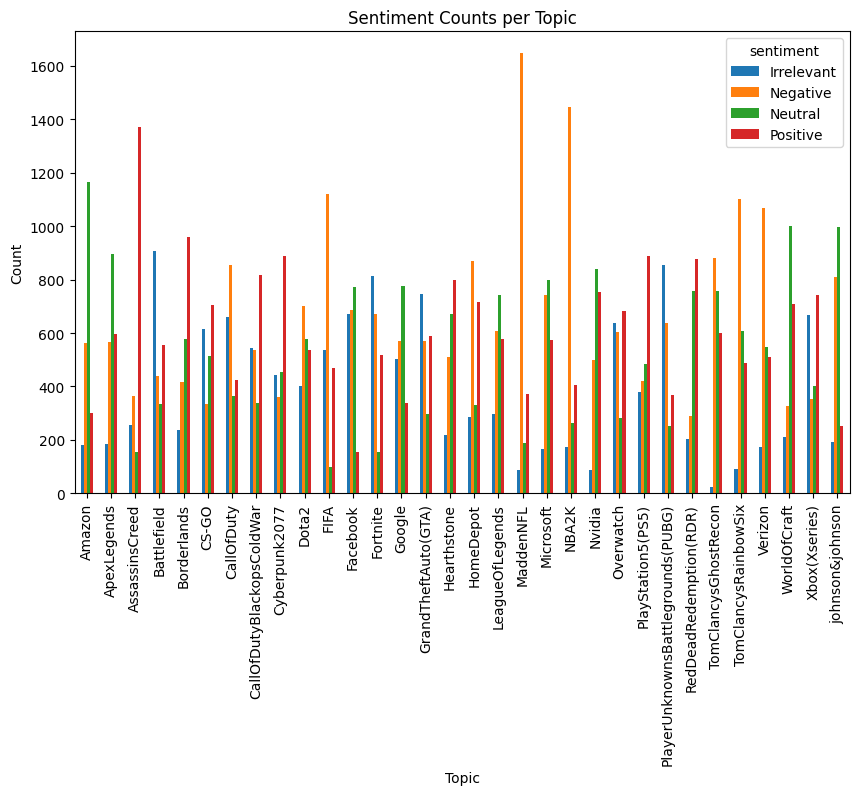

In [223]:
# Bar Chart of Sentiment Counts per Topic
sentiment_counts = df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Counts per Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

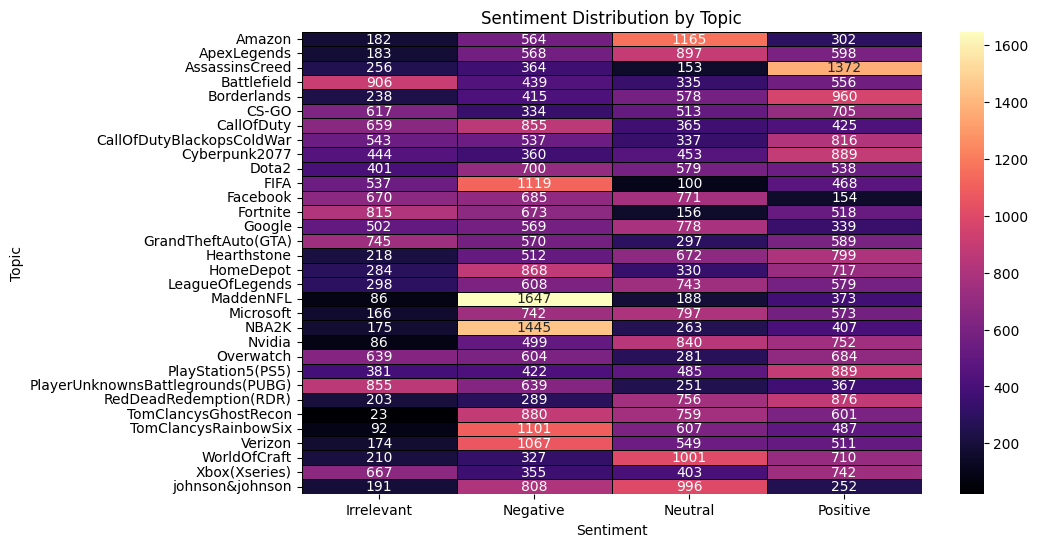

In [224]:
# Heatmap of sentiment distribution by topic
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['topic'], columns=df['sentiment'])

# Heatmap
sns.heatmap(count_table, cmap='magma', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

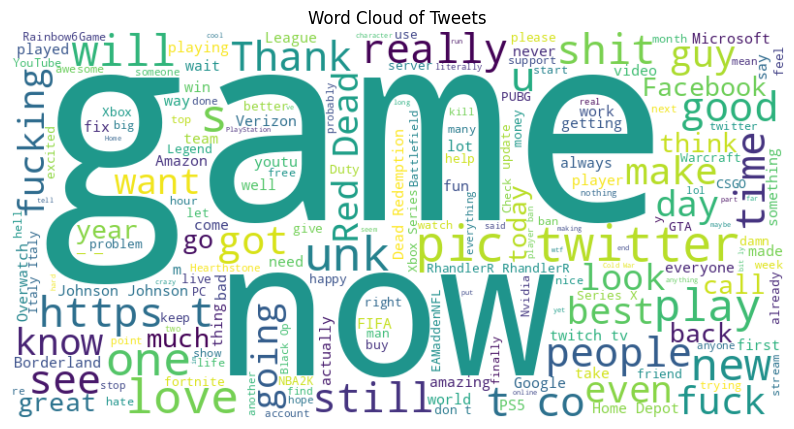

In [225]:
# Concatenate all tweets into a single string
all_tweets_text = ' '.join(df['text'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

###  Linguistic Data Preprocessing Using NLP

In [226]:
#Lowercasing
df['text']=df['text'].str.lower()
df.head()

,topic,sentiment,text
0,Borderlands,Positive,i am coming to the borders and i will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [227]:
#Remove html tags using Regular expressions

def remove_html_tags(text):
    return re.sub(r'<.*?>','', text)

In [228]:
#Remove URLs or hyperlinks

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

In [229]:
#Exclude numerical digits from the text

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [230]:
#Remove punctuation marks

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [231]:
#Remove stopwords
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)

    x=new_text[:]
    new_text.clear()
    return " ".join(x)

In [232]:
#Handling emojis

def remove_emojis(text):
    return emoji.demojize(text)

In [233]:
#Tokenization
def tokenize_text(text):
  return word_tokenize(text)

In [234]:
def preprocess_text(df):
    df['text'] = df['text'].apply(remove_html_tags)
    df['text'] = df['text'].apply(remove_urls)
    df['text'] = df['text'].apply(remove_numbers)
    df['text'] = df['text'].apply(remove_punctuation)
    df['text'] = df['text'].apply(remove_stopwords)
    df['text'] = df['text'].apply(remove_emojis)
    df['text'] = df['text'].apply(tokenize_text)
    return df
df_processed = preprocess_text(df)

In [235]:
# Convert list of words into a single string for each entry in 'text' column
df_processed['text'] = df_processed['text'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = df_processed['text']  # Features
y = df_processed['sentiment']  # Target

In [236]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9042418263810598


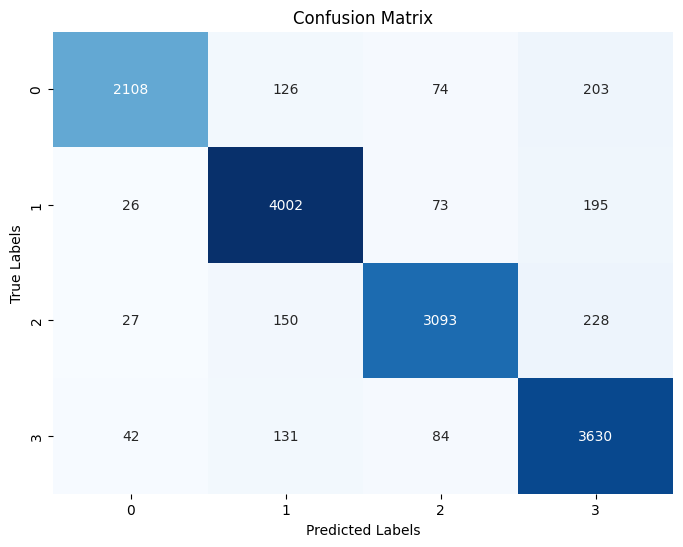

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.84      0.89      2511
    Negative       0.91      0.93      0.92      4296
     Neutral       0.93      0.88      0.91      3498
    Positive       0.85      0.93      0.89      3887

    accuracy                           0.90     14192
   macro avg       0.91      0.90      0.90     14192
weighted avg       0.91      0.90      0.90     14192



In [237]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)